# Code for creating plots for Fig. 2

Run the notebook sequentially cell by cell

In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.signal import convolve
import matplotlib as mpl

In [3]:
currdir=os.getcwd()

### This part processes velocity fields obtained using the python script 'velocity_profiles_v2.py' using raw data from  "/mnt/dioscuri-nas/Witek/20220225/1 min bright field". The raw data is not provided here due to a very large size (hundreds of GBs).

In [4]:
alldata=[]
with open(currdir+"\\data_Fig_2\\velocity_profiles_BR_1s.npb", 'rb') as f:
    for i in range(0,100):
        try:
            coords=np.load(f)
            data=np.load(f)
            snapshot=np.load(f)
            snapshot=0.5+0.5*snapshot/np.max(snapshot)
            alldata.append((coords,data,snapshot))
            print(i,": ",coords)
        except ValueError:
            print("end of file")
            break

0 :  [  0 152 202 739 745]
1 :  [   1 1107  171 1691  711]
2 :  [   0 1150  190 1729  743]
3 :  [  0 240 114 795 675]
4 :  [   1 1193   87 1757  651]
5 :  [  0 222 114 797 677]
6 :  [  0 234 118 797 671]
7 :  [  0 204 122 765 675]
8 :  [   1 1163   91 1713  647]
9 :  [  0 216 160 803 707]
10 :  [  0 208 120 771 675]
11 :  [  0 142 120 703 675]
12 :  [   1 1095   89 1655  647]
13 :  [  0 284 124 835 669]
14 :  [  0 216 130 763 679]
15 :  [  0 195 156 769 715]
16 :  [  0 256 182 849 727]
17 :  [  0 262 188 845 737]
18 :  [  0 230 206 807 747]
19 :  [   1 1175  179 1759  715]
20 :  [  0 206 164 781 729]
21 :  [  0 216 188 783 745]
22 :  [   1 1167  161 1743  723]
23 :  [  0 184 226 773 771]
24 :  [  0 176 224 759 775]
25 :  [   1 1125  199 1705  741]
26 :  [  0 192 115 779 669]
27 :  [   1 1141   85 1719  655]
28 :  [  0 142 146 717 687]
29 :  [   1 1093  111 1673  665]
30 :  [   0 1194  390 1783  939]
31 :  [   0 1160  356 1733  901]
32 :  [   0  272  466  847 1019]
33 :  [   1 1223  429

## Fig. 2A

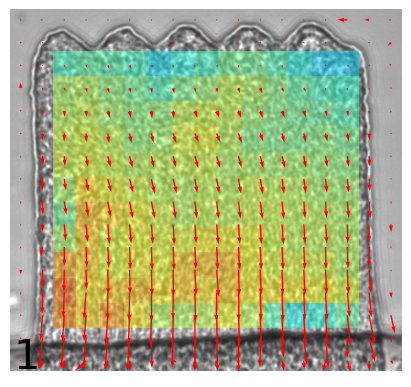

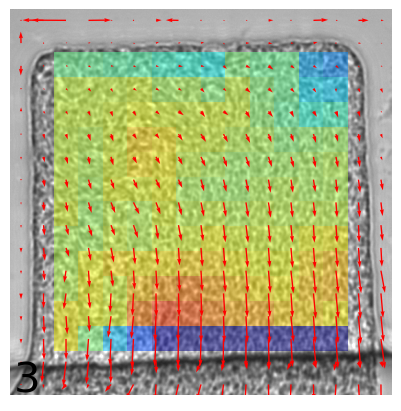

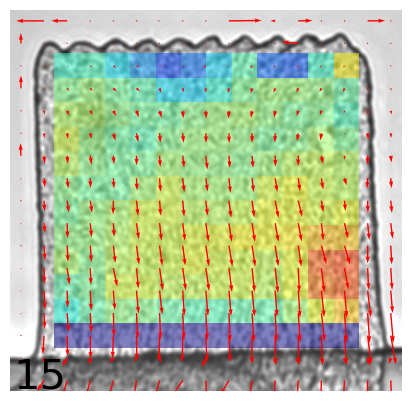

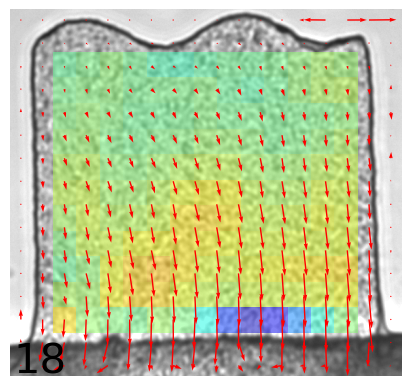

In [5]:
n=len(alldata)
mm=4
for i in [1,3,15,18]:
    fig = plt.figure(figsize=(4,4),constrained_layout=True)
    ax = fig.subplots()
    fig.patch.set_facecolor('w')
    coords,data,snapshot=alldata[i]
    h,w=coords[4]-coords[2],coords[3]-coords[1]
    ax.imshow(snapshot, 'gray', extent=[0, w, 0, h],vmin=0.5,vmax=0.9)
    x,y,vx,vy=data[0],data[1],data[2],data[3]
    dx=np.mean(np.diff(x))
    
    # signs are different due to the way how x,y are ordered :
    grrate=np.apply_along_axis(lambda x: np.convolve(x, [1/2.,0,-1/2.], mode='same'), 1, vx) - np.apply_along_axis(lambda x: np.convolve(x, [1/2.,0,-1/2.], mode='same'), 0, vy)
    grrate=grrate/(dx*2)
    
    grrate=convolve(grrate,np.array([[1,1,1],[1,1,1],[1,1,1]])/9.,mode="same")
    gr1=0.0 #np.min(grrate[2:-2,2:-2])
    gr2=0.6 # np.max(grrate[2:-2,2:-2])
    ax.imshow(grrate[2:-3,2:-3],extent=[64, w-64, 64, h-64],vmin=gr1,vmax=gr2,alpha=0.5,cmap=plt.cm.jet) 
    ax.quiver(x,y,vx,vy, color='red')
    ax.text(5,5,str(i),fontsize=30)
    ax.axis('off')
    plt.show()

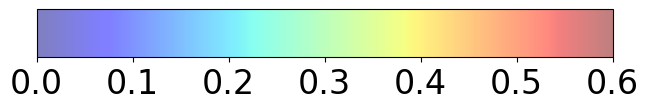

In [6]:
plt.rcParams['font.size'] = '24'
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=plt.cm.jet, norm=mpl.colors.Normalize(0, 0.6),alpha=0.5)
plt.rcParams['font.size'] = '12'

## Fig. 2B

nsam= 99
10   10


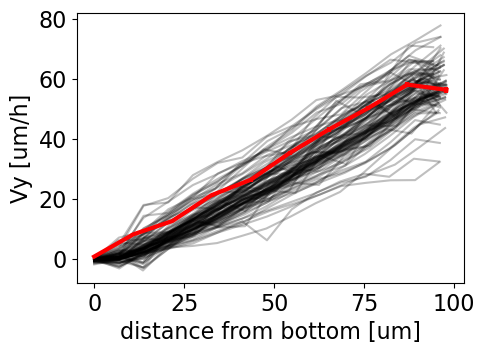

In [7]:
pixelsize=0.21 # mu/pixel
plt.rcParams["figure.figsize"] = (5,3.5)
params = {#'axes.labelsize': 16,
          #'axes.titlesize': 16,
         'font.size': 16}
plt.rcParams.update(params)

def plot_av_binned_xy(data,qx=1,binsize=1):
    # data must be in the form of a list of (x,y) lists of coordinates
    # x,y can have different length for different lists
    nsam=len(data)
    print("nsam=",nsam)
    x1=np.min([d[0] for d in data])
    x2=np.max([d[0] for d in data])
    nx=int((x2-x1)/binsize)
    xx=np.linspace(x1,x2,nx+1)
    yy=np.full((nx+1),0.) 
    yy2=np.full((nx+1),0.) 
    nn=np.full((nx+1),0) 
    for d in data:
        x,y=d
        inds=np.array(nx*(np.array(x)-x1)/(x2-x1),dtype=int)
        yy[inds]+=y
        yy2[inds]+=y*y
        nn[inds]+=1
        #print(inds)
    yy=yy/(nn+1e-12)
    yy2=yy2/(nn+1e-12)
    yy=yy[nn>0]
    yy2=yy2[nn>0]
    xx=xx[nn>0]
    nn=nn[nn>0]
    yy2=np.sqrt((yy2-yy*yy)/nn)
    print(len(xx)," ",len(yy))
    plt.errorbar(xx*qx,yy,yy2,linewidth=3,color='red')

xys=[]
for i in [3,4,5,6,7,8,10,11,13,14,20]:  # only flat-bottom wells 
    coords,data,snapshot=alldata[i]
    x,y,vx,vy=data[0],data[1],data[2],data[3]
    for j in range(4,len(vy[0])-4):
        xx=(y[0,0]-y[:,0])*pixelsize
        yy=-vy[:,j]*pixelsize
        yy=yy[xx<100]
        xx=xx[xx<100]
        plt.plot(xx,yy,c='black',alpha=0.25)
        xys.append((xx,yy))
plot_av_binned_xy(xys,qx=1,binsize=10)
plt.xlabel("distance from bottom [um]")
plt.ylabel("Vy [um/h]")
plt.show()

## Fig. 2D

### higher-resolution data is necessary to look at the horizontal component of the velocity field:

In [8]:
alldata=[]
with open(currdir+"\\data_Fig_2\\velocity_profiles_BR_1s_b16.npb", 'rb') as f:
    for i in range(0,100):
        try:
            coords=np.load(f)
            data=np.load(f)
            snapshot=np.load(f)
            snapshot=0.5+0.5*snapshot/np.max(snapshot)
            alldata.append((coords,data,snapshot))
            print(i,": ",coords)
        except ValueError:
            print("end of file")
            break

0 :  [  0 152 202 739 745]
1 :  [   1 1107  171 1691  711]
2 :  [   0 1150  190 1729  743]
3 :  [  0 240 114 795 675]
4 :  [   1 1193   87 1757  651]
5 :  [  0 222 114 797 677]
6 :  [  0 234 118 797 671]
7 :  [  0 204 122 765 675]
8 :  [   1 1163   91 1713  647]
9 :  [  0 216 160 803 707]
10 :  [  0 208 120 771 675]
11 :  [  0 142 120 703 675]
12 :  [   1 1095   89 1655  647]
13 :  [  0 284 124 835 669]
14 :  [  0 216 130 763 679]
15 :  [  0 195 156 769 715]
16 :  [  0 256 182 849 727]
17 :  [  0 262 188 845 737]
18 :  [  0 230 206 807 747]
19 :  [   1 1175  179 1759  715]
20 :  [  0 206 164 781 729]
21 :  [  0 216 188 783 745]
22 :  [   1 1167  161 1743  723]
23 :  [  0 184 226 773 771]
24 :  [  0 176 224 759 775]
25 :  [   1 1125  199 1705  741]
26 :  [  0 192 115 779 669]
27 :  [   1 1141   85 1719  655]
28 :  [  0 142 146 717 687]
29 :  [   1 1093  111 1673  665]
30 :  [   0 1194  390 1783  939]
31 :  [   0 1160  356 1733  901]
32 :  [   0  272  466  847 1019]
33 :  [   1 1223  429

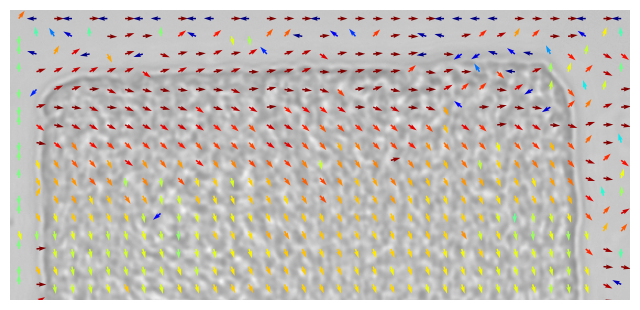

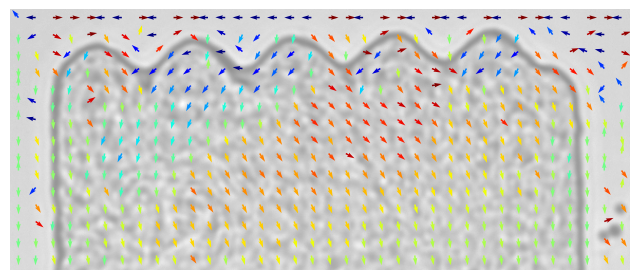

In [9]:
plt.rcParams["figure.figsize"] = (8,4)
for i in [4,9]:
    coords,data,snapshot=alldata[i]
    h,w=coords[4]-coords[2],coords[3]-coords[1]
    plt.imshow(snapshot, 'gray', extent=[0, w, 0, h],vmin=0.0,vmax=1)
    x,y,vx,vy=data[0],data[1],data[2],data[3]
    vv=np.sqrt(vx**2 + vy**2)
    vx=vx/vv
    vy=vy/vv
    dirs=np.arctan2(vx,vy)
    plt.ylim(bottom=300)
    plt.quiver(x,y,vx,vy,vx, cmap=plt.cm.jet)
    plt.axis('off')
    plt.show()

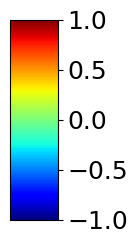

In [10]:
plt.rcParams['font.size'] = '18'
fig = plt.figure()
ax = fig.add_axes([0.0, 0.10, 0.06, 0.5])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap=plt.cm.jet, norm=mpl.colors.Normalize(-1, 1))
plt.rcParams['font.size'] = '12'

## Fig. 2C

In [11]:
# prepare the data
xys=[]
for i in [3,4,5,6,7,8,10,11,12,13,14,20]:  # only flat-bottom wells 
    coords,data,snapshot=alldata[i]
    x,y,vx,vy=data[0],data[1],data[2],data[3]
    vv=np.sqrt(vx**2 + vy**2)
    vx=vx/vv
    vy=vy/vv    
    for j in range(2,len(vy[0])-2):
        xx=(y[0,0]-y[:,0])*pixelsize
        yy=np.abs(vx[:,j]*pixelsize)
        yy=yy[xx<100]
        xx=xx[xx<100]
        xys.append((xx,yy))

nsam= 368
20   20


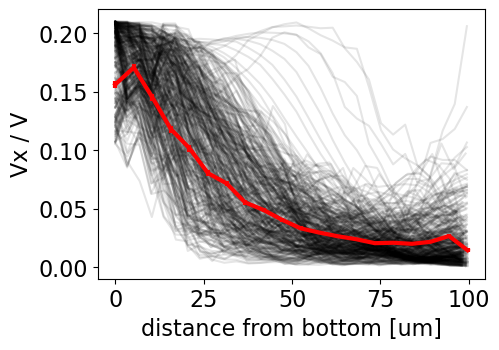

In [12]:
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams['font.size'] = '16'

def moving_average(data,n):
    return np.array([np.mean(data[max(0,i-n//2):min(len(data)-1,i+n//2)]) for i in range(0,len(data))])

def plot_av_binned_xy(data,qx=1,binsize=5):
    # data must be in the form of a list of (x,y) lists of coordinates
    # x,y can have different length for different lists
    nsam=len(data)
    print("nsam=",nsam)
    x1=np.min([d[0][0] for d in data])
    x2=np.max([d[0][-1] for d in data])
    nx=int((x2-x1)/binsize)
    xx=np.linspace(x1,x2,nx+1)
    yy=np.full((nx+1),0.) 
    yy2=np.full((nx+1),0.) 
    nn=np.full((nx+1),0) 
    for d in data:
        x,y=d
        inds=np.array(nx*(np.array(x)-x1)/(x2-x1),dtype=int)
        yy[inds]+=y
        yy2[inds]+=y*y
        nn[inds]+=1
    yy=yy/(nn+1e-12)
    yy2=yy2/(nn+1e-12)
    yy=yy[nn>0]
    yy2=yy2[nn>0]
    xx=xx[nn>0]
    nn=nn[nn>0]
    yy2=np.sqrt((yy2-yy*yy)/nn)
    print(len(xx)," ",len(yy))
    plt.errorbar(xx*qx,yy,yy2,linewidth=3,color='red')

for xy in xys:
    xx,yy=xy
    plt.plot(xx,moving_average(yy,5),color='black',alpha=0.1)
plot_av_binned_xy(xys)
plt.xlabel("distance from bottom [um]")
plt.ylabel("Vx / V")
plt.show()